## Bank Customer Churn Prediction Using Machine Learning
## -------------------------------------------------------------------
### Objective 
### 1. What factors cause churn? (age, balance, tenure)
### 2. Build a ML Model to predict if a customer will churn or not
### 3. Insights and recommendations for bank to reduce churn
               

## Setup and Data Understanding

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

In [6]:
#Load the dataset and read
churn = pd.read_csv("E:/Bank_Churn_Prediction_Dataset/Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [8]:
#Data types of columns
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [9]:
#No of records
churn.shape

(10002, 14)

In [10]:

churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Data Cleaning

In [11]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
churn[churn['Geography'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.0,2,1.0,1.0,10062.8,0


In [13]:
churn[churn['Age'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [14]:
churn[churn['HasCrCard'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.1,0


In [15]:
churn[churn['IsActiveMember'].isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.5,0


In [17]:
#Filling the null values with mode (most common value)
churn['HasCrCard'] = churn['HasCrCard'].fillna(churn['HasCrCard'].mode()[0])


In [18]:
churn['Geography'] = churn['Geography'].fillna(churn['Geography'].mode()[0])
churn['Age'] = churn['Age'].fillna(churn['Age'].mode()[0])
churn['IsActiveMember'] = churn['IsActiveMember'].fillna(churn['IsActiveMember'].mode()[0])

In [19]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
#Encoding categorical columns to numerical - Gender and Geography
churn['Gender'] = churn['Gender'].map({'Female': 0, 'Male': 1})


In [21]:
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,France,1,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,0,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,1,44.0,4,142051.07,2,0.0,1.0,74940.50,0
9,10,15592389,H?,684,France,1,37.0,2,134603.88,1,1.0,1.0,71725.73,0


In [22]:
churn.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### one-hot encoding

In [23]:
churn = pd.get_dummies(churn, columns=['Geography'], drop_first=True)

In [24]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False
1,2,15647311,Hill,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True
2,3,15619304,Onio,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0,False,True


### Check class balance of target column 'Exited'
#### Why? this is a classification problem or class imbalance problem. When one class appears more than the other, then the model becomes biased.
#### if its 50/50 - normal, 80/20 - worse

In [25]:
churn['Exited'].value_counts()


Exited
0    7964
1    2038
Name: count, dtype: int64

#### 2038/(2038+7964) = 20.4% , 20% people churned(left) the bank

## Exploratory Data Analysis


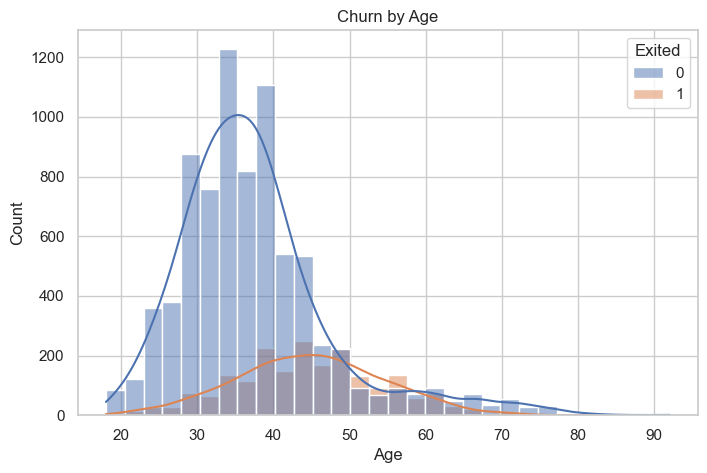

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(data=churn, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Churn by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Insight - People aged between 40 and 50 show a noticeable higher churn rate.

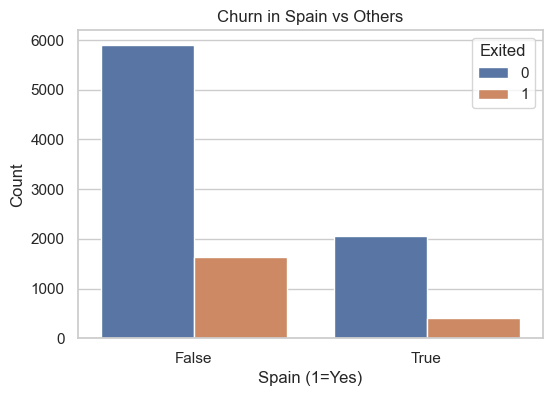

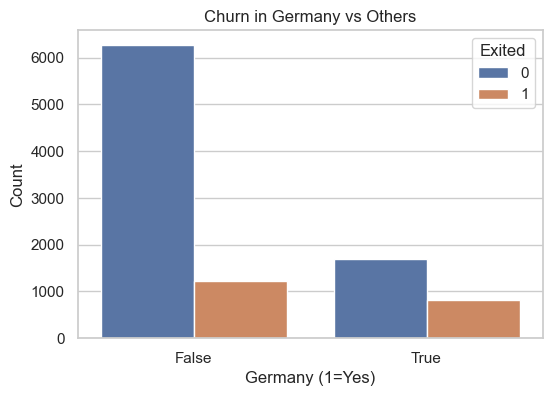

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=churn, x='Geography_Spain', hue='Exited')
plt.title('Churn in Spain vs Others')
plt.xlabel('Spain (1=Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=churn, x='Geography_Germany', hue='Exited')
plt.title('Churn in Germany vs Others')
plt.xlabel('Germany (1=Yes)')
plt.ylabel('Count')
plt.show()


### Insight - Most spanish customers tend to stay with bank which is relatively loyal customer base. German customers have a high churn rate

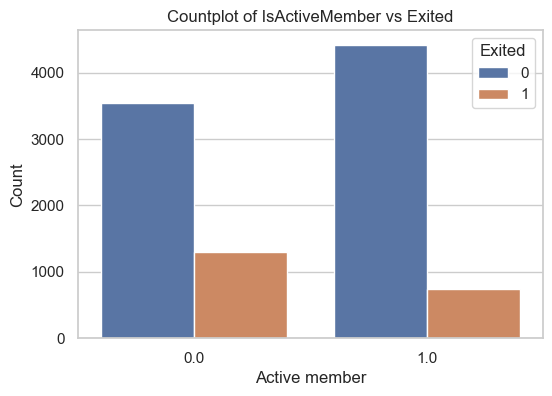

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data = churn, x = 'IsActiveMember', hue = 'Exited')
plt.title("Countplot of IsActiveMember vs Exited")
plt.xlabel("Active member")
plt.ylabel("Count")
plt.show()

### Insight - Active Members tend to stay with bank. Engagement plays a key role

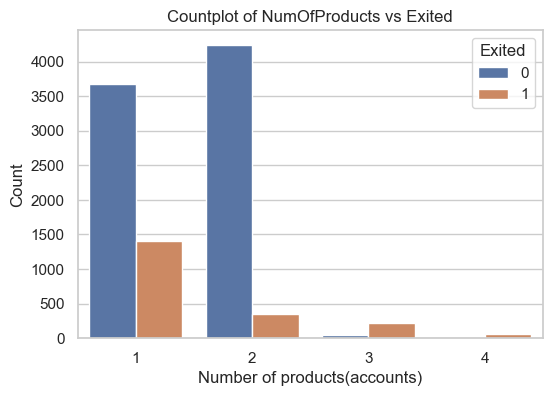

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data = churn, x = 'NumOfProducts', hue = 'Exited')
plt.title("Countplot of NumOfProducts vs Exited")
plt.xlabel("Number of products(accounts)")
plt.ylabel("Count")
plt.show()

### Insight - People with one or two accounts tend to stay with bank however most people with three or four accounts are more likely to churn the bank

In [35]:
churn_france = churn[(churn['Geography_Germany'] == 0) & (churn['Geography_Spain'] == 0)]
churn_france['Exited'].value_counts(normalize=True)


Exited
0    0.838485
1    0.161515
Name: proportion, dtype: float64

### Insight - Only 16% of French people have churned, indicating a loyal customer base compared to other countries.

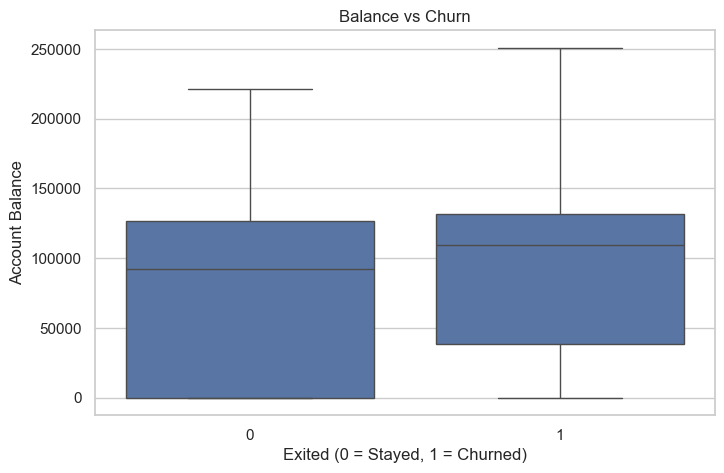

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(data=churn, x='Exited', y='Balance')
plt.title('Balance vs Churn')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Account Balance')
plt.show()


### Insight - People with higher account balance are more likely to churn. People with higher average account balance are also most likely to churn.

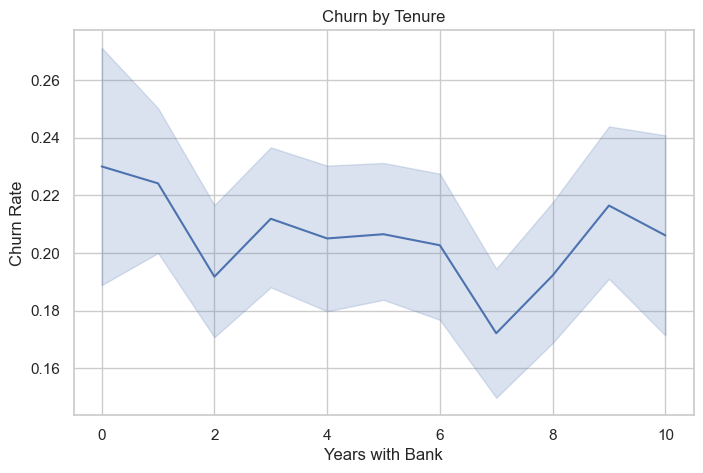

In [32]:
plt.figure(figsize=(8,5))
sns.lineplot(data=churn, x='Tenure', y='Exited')
plt.title('Churn by Tenure')
plt.xlabel('Years with Bank')
plt.ylabel('Churn Rate')
plt.show()


### Insight - At tenure = 0, churn rate is around 23%
###           At tenure = 2, churn rate drops to around 19%
###           At tenure = 7, churn rate is the lowest ~17%
###           At tenure = 9, churn rate rises up to ~22%

### Newer customers have the highest churn

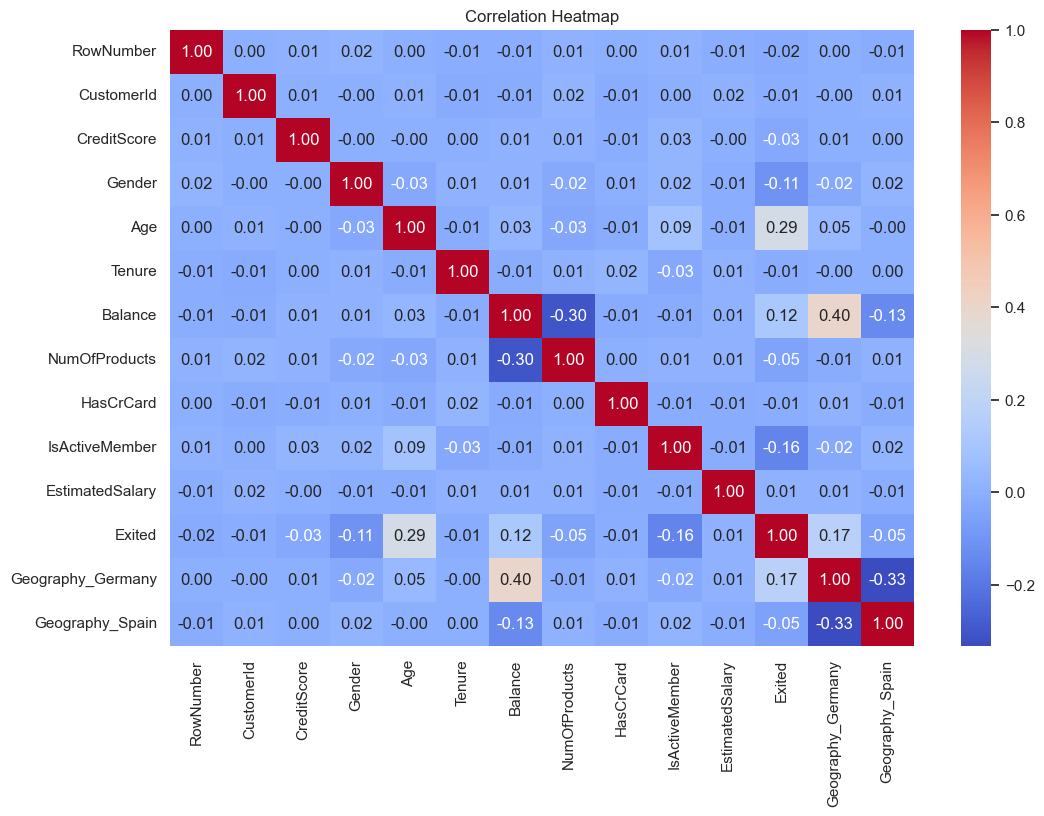

In [34]:
plt.figure(figsize=(12,8))
# Select only numeric columns before calculating correlation
numeric_df = churn.select_dtypes(include=['int64', 'float64', 'bool'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Insight - Age shows a positive correlation with churn, older people are more likely to churn. People with tenure less than one year and higher account balances are more likely to churn. Being an Active member correlates with churn, active members are more likely to stay with bank.

### Overall EDA Summary: The EDA reveals that age, geography, account balance, tenure, and product usage significantly influence churn. Active engagement and fewer products correlate with retention, while higher balances and certain countries like Germany show higher churn rates.

### Feature Engineering
#### Encoding for Gender and Geography columns have been already done

In [31]:
X = churn.drop('Exited', axis=1)  # All columns except Exited
y = churn['Exited']               # Only the target column


### Model Building and Model Evaluation

### 1. Logistic Regression

In [50]:
X = churn.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)  # Drop target + string column
y = churn['Exited']

In [51]:
# Feature scaling for Logistic Regression using StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [52]:
# Step 1: Train-test split - performed before scaling
# 0.2 = 20% of data to test and 80% of data to train the model
# random_state is a setting of seed so that everytime the code runs, it gives the same split of test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 2: Initialize the scaler
scaler = StandardScaler()

# Step 3: Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [53]:
#Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Step 2: Make predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# Step 3: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Accuracy: 0.8205897051474262
Precision: 0.5985401459854015
Recall: 0.21243523316062177
F1-score: 0.3135755258126195
Confusion Matrix:
 [[1560   55]
 [ 304   82]]


### 2.Decision Tree Classifier

In [54]:
#Import the model
from sklearn.tree import DecisionTreeClassifier


In [55]:
#Initialize and train the model
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [56]:
#Make Predictions
y_pred_dtree = dtree.predict(X_test)


In [57]:
#Evaluate the performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Precision:", precision_score(y_test, y_pred_dtree))
print("Recall:", recall_score(y_test, y_pred_dtree))
print("F1-score:", f1_score(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))


Accuracy: 0.8010994502748626
Precision: 0.4859154929577465
Recall: 0.5362694300518135
F1-score: 0.5098522167487685
Confusion Matrix:
 [[1396  219]
 [ 179  207]]


### Random Forest Classifier

In [58]:
#Scaled Data
X_train_scaled
X_test_scaled
y_train
y_test


6206    0
1520    1
5921    0
5196    0
7160    0
       ..
6202    0
3922    0
162     0
5342    0
2243    1
Name: Exited, Length: 2001, dtype: int64

In [59]:
#Import model
from sklearn.ensemble import RandomForestClassifier

#Initialize and train the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=1)

In [60]:
#Make predictions
y_pred_rf = rf.predict(X_test_scaled)


In [61]:
# Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.8700649675162418
Precision: 0.7739130434782608
Recall: 0.46113989637305697
F1-score: 0.577922077922078
Confusion Matrix:
 [[1563   52]
 [ 208  178]]


### Feature Importance Plot


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_

# Match importances to feature names
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)


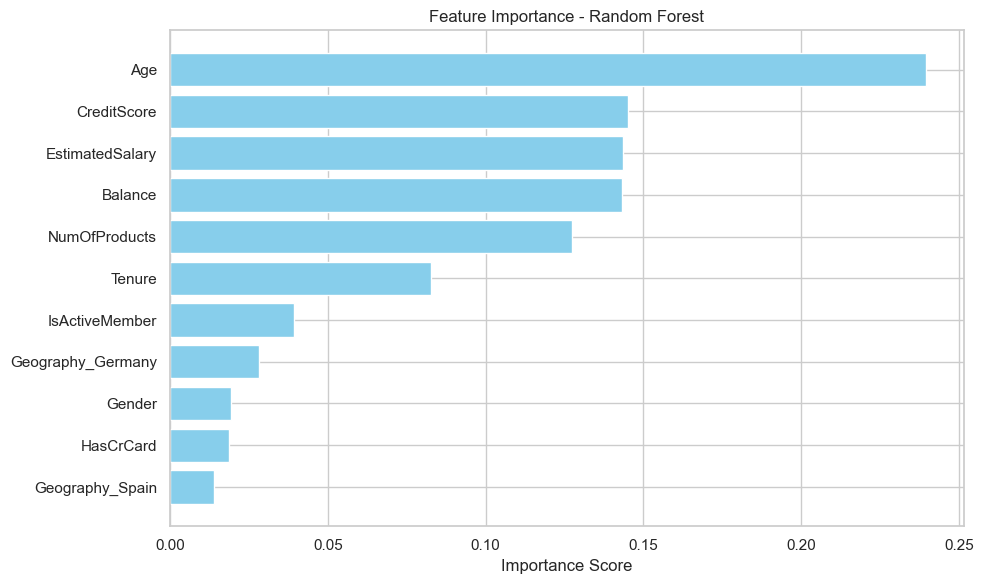

In [66]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest on top
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


### Retraining the model using top features

In [71]:
top_features = ['Age', 'CreditScore', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'Tenure', 'IsActiveMember', 'Gender', 'HasCrCard']
X_top = X[top_features]


In [72]:
#Redo train-test split and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=1)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [73]:
#Retrain the Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)


In [74]:
#Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.8610694652673663
Precision: 0.7389380530973452
Recall: 0.4326424870466321
F1-score: 0.545751633986928
Confusion Matrix:
 [[1556   59]
 [ 219  167]]


### Model Comparison

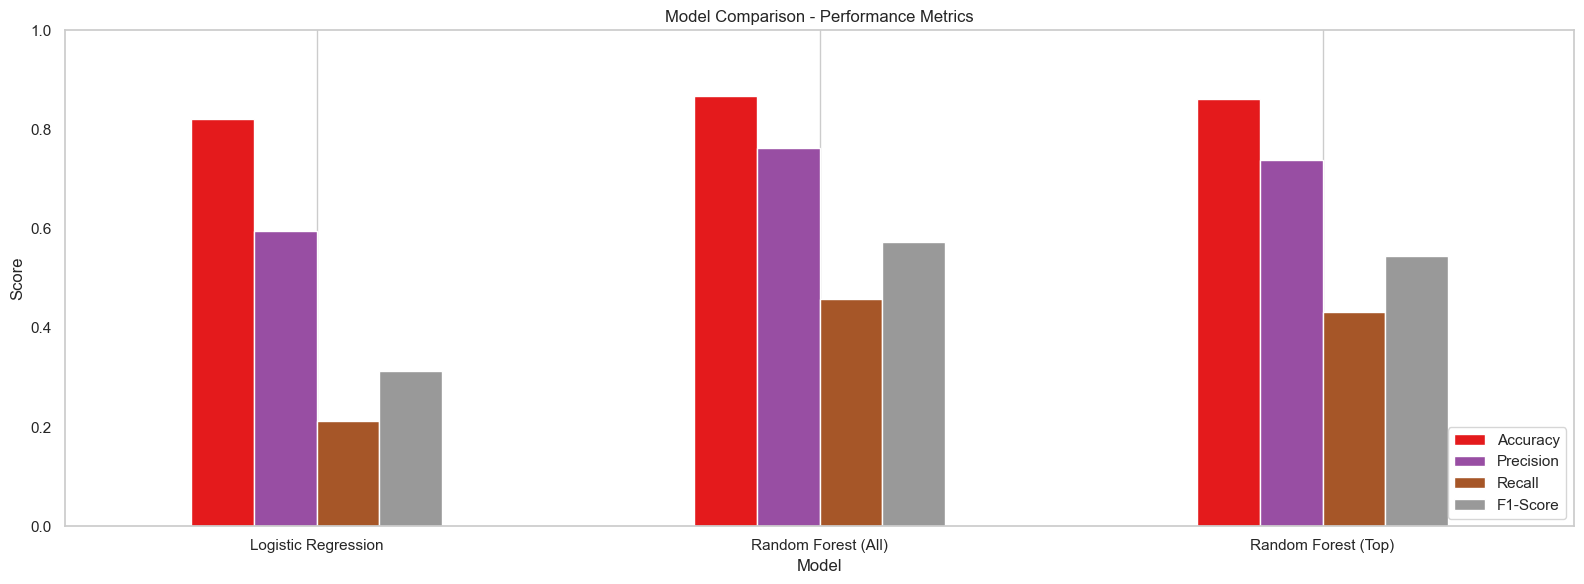

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create the data
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest (All)', 'Random Forest (Top)'],
    'Accuracy': [0.8206, 0.8681, 0.8611],
    'Precision': [0.5958, 0.7629, 0.7389],
    'Recall': [0.2124, 0.4585, 0.4326],
    'F1-Score': [0.3136, 0.5728, 0.5458]
}

# Step 2: Create a DataFrame
df_comparison = pd.DataFrame(comparison_data)

# Step 3: Set the index to Model for better plotting
df_comparison.set_index('Model', inplace=True)

# Step 4: Plot grouped bar chart
df_comparison.plot(kind='bar', figsize=(16, 6), colormap='Set1')
plt.title('Model Comparison - Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [85]:
#Save the file to local for POWER BI Dashboard
churn.to_csv('E:/Bank_Churn_Prediction_Dataset/churn_cleaned.csv', index=False)